In [186]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn_qqplot as sqp
import scipy.stats as stats
sns.set(style="darkgrid")
sns.set(font_scale=1.5)
import pandas as pd
from scipy import spatial
import sklearn
from sklearn import preprocessing


In [177]:
age = np.array([23, 23, 27, 27, 39, 41, 47, 49, 50, 52, 54, 54, 56, 57, 58, 58, 60, 61])
fat = np.array([9.5, 26.5, 7.8, 17.8, 31.4, 25.9, 27.4, 27.2, 31.2, 34.6, 42.5, 28.8, 33.4, 30.2, 34.1, 32.9, 41.2, 35.7])
df = pd.DataFrame(list(zip(age, fat)), columns=['age', '%fat'])

In [178]:
df

,age,%fat
0,23,9.5
1,23,26.5
2,27,7.8
3,27,17.8
4,39,31.4
5,41,25.9
6,47,27.4
7,49,27.2
8,50,31.2
9,52,34.6


In [179]:
#2.4
df.describe()

,age,%fat
count,18.000000,18.000000
mean,46.444444,28.783333
std,13.218624,9.254395
min,23.000000,7.800000
25%,39.500000,26.675000
50%,51.000000,30.700000
75%,56.750000,33.925000
max,61.000000,42.500000


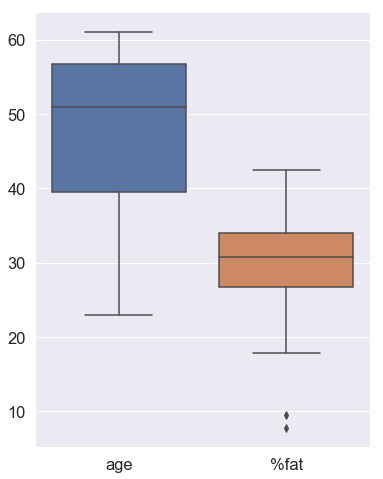

In [180]:
plt.figure(figsize=(6, 8))
ax = sns.boxplot(data=df)

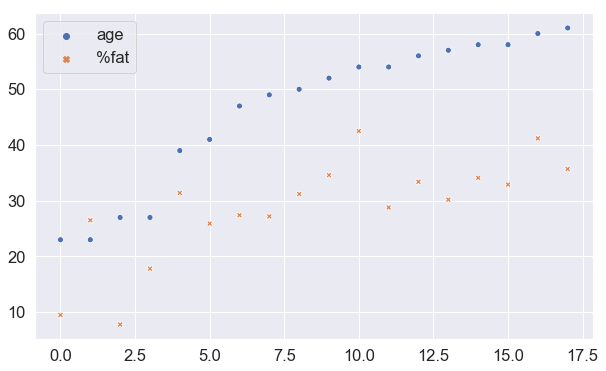

In [181]:
plt.figure(figsize=(10, 6))
ax2 = sns.scatterplot(data=df)

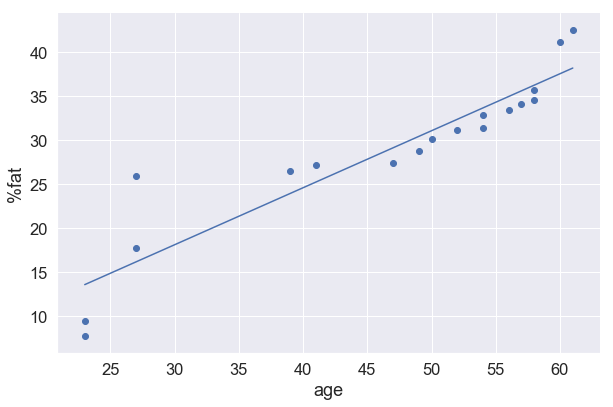

In [198]:
sqp.qqplot(df, x='age', y='%fat', height = 6, aspect = 1.5, display_kws={"identity":False,"fit":True} )

In [80]:
# 2.8
A1 = [1.5, 2, 1.6, 1.2, 1.5]
A2 = [1.7, 1.9, 1.8, 1.5, 1.0]
index = ['x1', 'x2', 'x3', 'x4', 'x5']
df = pd.DataFrame(list(zip(A1, A2)), index = index, columns=['A1', 'A2'])
# data = np.array(list(zip(A1, A2)))
data = list(zip(A1, A2))

In [59]:
data

[(1.5, 1.7), (2, 1.9), (1.6, 1.8), (1.2, 1.5), (1.5, 1.0)]

In [108]:
x = np.array([1.4, 1.6])

In [95]:
def getRank(dis):
    sortedDis = sorted(dis)
    return [sortedDis.index(d) + 1 for d in dis] 

In [96]:
dis = []
for a,b in data:
#     print(f'{a}\t{b}')
    dis.append( math.sqrt( pow(a - x[0], 2) + pow(b - x[1], 2)) )
rankEu = getRank(dis)
df['Euclidean'] = rankEu

In [97]:
df

,A1,A2,Euclidean,Manhattan,Supremum
x1,1.5,1.7,1,1,1
x2,2.0,1.9,5,5,4
x3,1.6,1.8,3,3,3
x4,1.2,1.5,2,2,2
x5,1.5,1.0,4,4,4


In [98]:
dis = []
for a,b in data:
    dis.append( abs(a - x[0]) + abs(b - x[1])) 
rank = getRank(dis)
df['Manhattan'] = rank
print(dis)
print(df)

[0.19999999999999996, 0.8999999999999999, 0.40000000000000013, 0.30000000000000004, 0.7000000000000002]
     A1   A2  Euclidean  Manhattan  Supremum
x1  1.5  1.7          1          1         1
x2  2.0  1.9          5          5         4
x3  1.6  1.8          3          3         3
x4  1.2  1.5          2          2         2
x5  1.5  1.0          4          4         4


In [99]:
dis = []
for a,b in data:
    dis.append( max(abs(a - x[0]), abs(b - x[1]))) 
rank = getRank(dis)
df['Supremum'] = rank
print(dis)
print(df)

[0.10000000000000009, 0.6000000000000001, 0.20000000000000018, 0.19999999999999996, 0.6000000000000001]
     A1   A2  Euclidean  Manhattan  Supremum
x1  1.5  1.7          1          1         1
x2  2.0  1.9          5          5         4
x3  1.6  1.8          3          3         3
x4  1.2  1.5          2          2         2
x5  1.5  1.0          4          4         4


In [124]:
dis = []
xNorm = math.sqrt(x[0]*x[0] + x[1]*x[1])
xNorm = np.linalg.norm(x)

for a,b in data:
    dis.append( (np.dot(np.array([a, b]), x)) / xNorm * np.linalg.norm(np.array([a,b])))

dis.reverse() # because it measures similarity
rank = getRank(dis)
df['Cosine'] = rank
print(dis)
print(df)

[3.1374310273418646, 3.6864141869196034, 5.799823006148969, 7.577674708134472, 5.139955752021934]
     A1   A2  Euclidean  Manhattan  Supremum  Cosine  Cosine-Scikit  \
x1  1.5  1.7          1          1         1       1              1   
x2  2.0  1.9          5          5         4       2              3   
x3  1.6  1.8          3          3         3       4              4   
x4  1.2  1.5          2          2         2       5              2   
x5  1.5  1.0          4          4         4       3              5   

    Cosine-Scipy  
x1             1  
x2             4  
x3             2  
x4             3  
x5             5  


In [125]:
dis = []
for a,b in data:
    dis.append( spatial.distance.cosine(x, np.array([a, b]) ))
rank = getRank(dis)
df['Cosine-Scipy'] = rank
print(dis)
print(df)

[8.608556044009674e-06, 0.004247738747112373, 3.0516181212303373e-05, 0.0009717650624380125, 0.03463660697173376]
     A1   A2  Euclidean  Manhattan  Supremum  Cosine  Cosine-Scikit  \
x1  1.5  1.7          1          1         1       1              1   
x2  2.0  1.9          5          5         4       2              3   
x3  1.6  1.8          3          3         3       4              4   
x4  1.2  1.5          2          2         2       5              2   
x5  1.5  1.0          4          4         4       3              5   

    Cosine-Scipy  
x1             1  
x2             4  
x3             2  
x4             3  
x5             5  


In [126]:
dis = []
for a,b in data:
    dis.append( sklearn.metrics.pairwise.cosine_similarity(x.reshape(1, -1), np.array([a, b]).reshape(1, -1) ))
dis.reverse()
rank = getRank(dis)
df['Cosine-Scikit'] = rank
print(dis)
print(df)

[array([[0.96536339]]), array([[0.99902823]]), array([[0.99996948]]), array([[0.99575226]]), array([[0.99999139]])]
     A1   A2  Euclidean  Manhattan  Supremum  Cosine  Cosine-Scikit  \
x1  1.5  1.7          1          1         1       1              1   
x2  2.0  1.9          5          5         4       2              3   
x3  1.6  1.8          3          3         3       4              4   
x4  1.2  1.5          2          2         2       5              2   
x5  1.5  1.0          4          4         4       3              5   

    Cosine-Scipy  
x1             1  
x2             4  
x3             2  
x4             3  
x5             5  


In [127]:
display(df)

,A1,A2,Euclidean,Manhattan,Supremum,Cosine,Cosine-Scikit,Cosine-Scipy
x1,1.5,1.7,1,1,1,1,1,1
x2,2.0,1.9,5,5,4,2,3,4
x3,1.6,1.8,3,3,3,4,4,2
x4,1.2,1.5,2,2,2,5,2,3
x5,1.5,1.0,4,4,4,3,5,5


In [128]:
df.describe()

,A1,A2,Euclidean,Manhattan,Supremum,Cosine,Cosine-Scikit,Cosine-Scipy
count,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000
mean,1.560000,1.580000,3.000000,3.000000,2.80000,3.000000,3.000000,3.000000
std,0.288097,0.356371,1.581139,1.581139,1.30384,1.581139,1.581139,1.581139
min,1.200000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
25%,1.500000,1.500000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000
50%,1.500000,1.700000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000
75%,1.600000,1.800000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000
max,2.000000,1.900000,5.000000,5.000000,4.00000,5.000000,5.000000,5.000000


In [153]:
#2.8 (b)
df = pd.DataFrame(list(zip(A1, A2)), index = index, columns=['A1', 'A2'])

In [154]:
data = preprocessing.normalize(df, norm='l2')


In [155]:
dis = []
for a,b in data:
#     print(f'{a}\t{b}')
    dis.append( math.sqrt( pow(a - x[0], 2) + pow(b - x[1], 2)) )
rankEu = getRank(dis)
df['A1norm'] = data[:, 0]
df['A2norm'] = data[:, 1]
df['Euclidean'] = rankEu
display(df)

,A1,A2,A1norm,A2norm,Euclidean
x1,1.5,1.7,0.661622,0.749838,1
x2,2.0,1.9,0.724999,0.688749,4
x3,1.6,1.8,0.664364,0.747409,2
x4,1.2,1.5,0.624695,0.780869,3
x5,1.5,1.0,0.832050,0.554700,5


In [158]:
#3.7
age = [13, 15, 16, 16, 19, 20, 20, 21, 22, 22, 25, 25, 25, 25, 30, 33, 33, 35, 35, 35, 35, 36, 40, 45, 46, 52, 70]

In [159]:
minV = min(age)
maxV = max(age)
rangeV = maxV - minV

In [160]:
norm = [ (v - minV) / rangeV for v in age]

In [164]:
(35 - minV) / rangeV

0.38596491228070173

In [163]:
minV

13

In [167]:
mean = np.mean(age)

In [168]:
mean

29.962962962962962

In [172]:
sd = np.std(age)

In [173]:
sd

12.700193878606099

In [174]:
(35 - mean) / 12.94

0.38926097658709724

In [236]:
# 3.9
sales = np.array([5, 10, 11, 13, 15, 35, 50, 55, 72, 92, 204, 215])

In [208]:
len(sales)

12

In [233]:
from sklearn.cluster import KMeans

In [234]:
kmeans = KMeans(n_clusters=3)

In [239]:
salesRe = sales.reshape(-1, 1)
kmeans.fit(salesRe)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [240]:
labels = kmeans.predict(salesRe)

In [241]:
labels

array([0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1])